**决策树(DTs)** 是一种用于分类和回归的非参数有监督学习方法。其目标是创建一个模型，通过学习从数据特性中推断出的简单决策规则来预测目标变量的值。

例如，在下面的示例中，决策树从数据中学习，用一组if-then-else的决策规则来逼近正弦曲线。树越深，决策规则越复杂，模型越适合。

例如，在下面的示例中，决策树从数据中学习，用一组if-then-else的决策规则来逼近正弦曲线。树越深，决策规则越复杂，模型越适合。
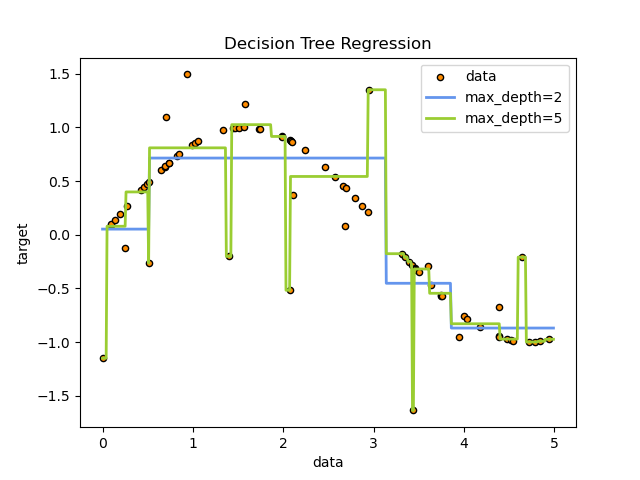

## 决策树的一些优点：

- 易于理解和解释。树可以被可视化。
- 几乎不需要数据准备。其他算法通常需要数据标准化，需要创建虚拟变量并删除缺失值。但是，请注意，此模块不支持缺失值。
- 使用树的成本(即预测数据)是用于训练树的数据点数的对数。
- 能够处理数值型和分类型数据。其他技术通常专门分析只有一种类型变量的数据集。有关更多信息，请参见algorithms 。
- 能够处理多输出问题。
- 使用白盒模型。如果给定的情况在模型中是可以观察到的，那么对条件的解释就很容易用布尔逻辑来解释。相反，在黑箱模型中(例如，在人工神经网络中)，结果可能很难解释。
- 可以使用统计测试验证模型。这样就有可能对模型的可靠性作出解释。
- 即使它的假设在某种程度上被生成数据的真实模型所违背，它也表现得很好。



## 决策树的缺点包括：

- 决策树学习器可以创建过于复杂的树，不能很好地概括数据。这就是所谓的过拟合。为了避免这个问题，必须设置剪枝、设置叶节点所需的最小样本数或设置树的最大深度等机制。

- 决策树可能是不稳定的，因为数据中的小变化可能导致生成完全不同的树。通过集成决策树来缓解这个问题。

- 学习最优决策树的问题在最优性的几个方面都是NP-complete的，甚至对于简单的概念也是如此。因此，实际的决策树学习算法是基于启发式算法，如贪婪算法，在每个节点上进行局部最优决策。这种算法不能保证返回全局最优决策树。这可以通过训练多棵树再集成一个学习器来缓解，其中特征和样本被随机抽取并替换。

- 有些概念很难学习，因为决策树不能很容易地表达它们，例如异或、奇偶校验或多路复用器问题。

- 如果某些类占主导地位，则决策树学习者会创建有偏见的树。因此，建议在拟合决策树之前平衡数据集。

Setup:
    - pip install -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com  scikit-learn==0.23.2
    - pip install -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com  graphviz
   


## 决策树分类

- tree.DecisionTreeClassifier(*[, criterion, ...]) A decision tree classifier.

- tree.DecisionTreeRegressor(*[, criterion, ...]) A decision tree regressor.

- tree.ExtraTreeClassifier(*[, criterion, ...]) An extremely randomized tree classifier.

- tree.ExtraTreeRegressor(*[, criterion, ...]) An extremely randomized tree regressor.

- tree.export_graphviz(decision_tree[, ...]) Export a decision tree in DOT format.

- tree.export_text(decision_tree, *[, ...]) Build a text report showing the rules of a decision tree.


[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is a class capable of performing multi-class classification on a dataset.



** DecisionTreeClassifier** 是一个能够在数据集上执行多类分类的类。

与其他分类器一样，DecisionTreeClassifier使用两个数组作为输入：形状为[n_samples, n_features]的数组(稀疏或稠密)，以及整数值数组，形状[n_samples]，保存训练样本的类标签：

In [1]:
from sklearn import tree #导入工具包
import warnings
warnings.filterwarnings("ignore")

X = [[0, 0], [1, 1]]  #建数据
Y = [0, 1]  #标签
clf = tree.DecisionTreeClassifier() #使用某个具体函数
clf = clf.fit(X, Y) #模型训练

经拟合后，该模型可用于预测其他样本的类别：

In [2]:
clf.predict([[2., 2.]]) #预测

array([1])

DecisionTreeClassifier 既能够进行二分类(其中标签为[-1，1])，也能够进行多类分类(其中标签为[0，…K-1])分类。

使用Iris数据集，我们可以构建如下树：

In [3]:
import sklearn
import pandas as pd
#After importing sklearn, we can easily import the dataset from it
from sklearn.datasets import load_iris

通过pandas导入和查看数据表的情况

In [4]:
iriss = load_iris()#导入iris
df_iris = pd.DataFrame(iriss.data, columns=iriss.feature_names)#导入pandas的dataframe里列为属性名

## 数据发现
然后通过pandas的表操作展示iris数据

**head()** 函数展示前五行的所有数据属性和属性值

In [5]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**tail()** 函数展示最后五行的所有数据属性和属性值

In [6]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


所以我们可以看到最后一行标号是150也就是数据里有150个样本 150行数据

数据类型看一下

In [7]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

### 数据可视化 使用matpolotlib这里简写为plt
使用scatter_matrix展示两两属性的坐标系下数据的分布情况

In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df_iris,figsize=(10,10))
plt.show()

<Figure size 1000x1000 with 16 Axes>

也可以用seaborn来创建更多样颜色的的结果

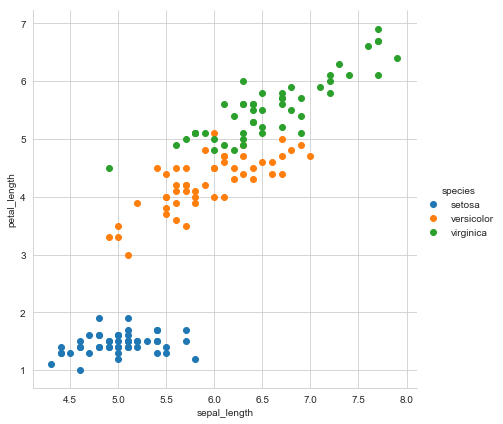

In [9]:
import seaborn as sns
 
iris = sns.load_dataset('iris')
 
# style used as a theme of graph
# for example if we want black
# graph with grid then write "darkgrid"
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()


# 我们开始使用sklearn去进行模型训练，总共6步

In [10]:
from sklearn.datasets import load_iris #从sklearn导入数据包，iris是内置的数据包 无需下载
from sklearn import tree #导入树的功能包
iris = load_iris() #有了包就可以载入数据啦
X, y = iris.data, iris.target #把数据中的特征值 和 标签 分别放到两个变量里
clf = tree.DecisionTreeClassifier() #把功能包tree中的分类决策树函数拿过来，赋给clf变量
clf = clf.fit(X, y) #将两个变量里的 特征值和标签带入clf的函数中去 fit进行模型训练

训练好了 完成

## 我们使用graphviz展示决策树
这里需要安装graphviz，具体只要看下就可以了，对后面代码不做要求


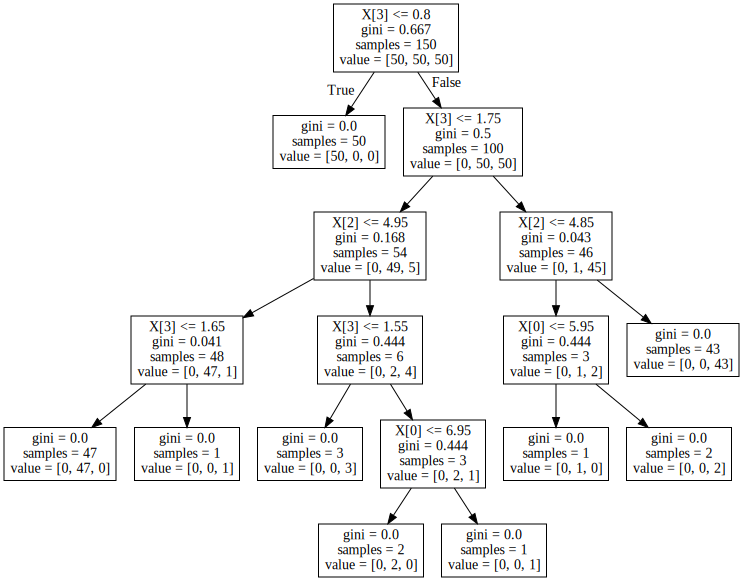

In [11]:
import graphviz 

import os
os.environ["PATH"] += os.pathsep + 'D:\Program Files\Graphviz\bin'
os.environ["PATH"] += os.pathsep + 'D:\Program Files\Graphviz\bin\dot.exe'

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph

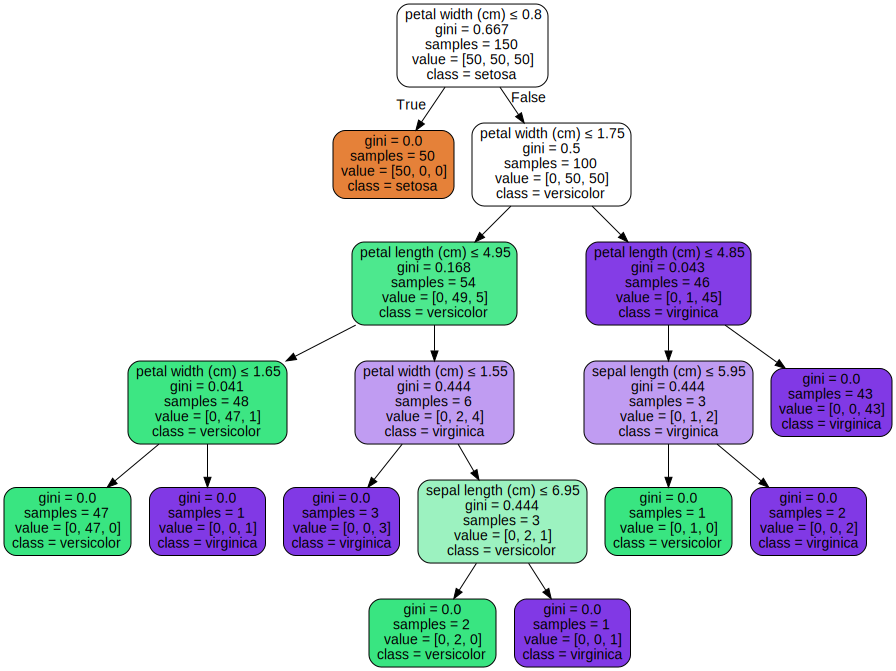

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [13]:
[更多的资源请查看sklearn官网信息] (https://scikit-learn.org/0.20/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py)

SyntaxError: invalid syntax (<ipython-input-13-7a5256b67b24>, line 1)

# 决策回归树的拟合情况，可以设置不同的maxdepth来看过拟合和欠拟合的情况

Automatically created module for IPython interactive environment


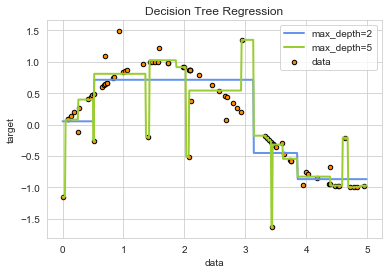

In [15]:
print(__doc__)

# 导入模块和包
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 创建随机数据
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# fit训练决策树回归模型
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict预测
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# 展示
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 人脸自动填补 使用多输出估算器完成人脸绘制
示例说明了使用多输出估算器来完成图像。目标是根据给定脸部的上半部分来预测其下半部分。

图像的第一列显示真实面孔。下几列说明了极端随机树，k近邻，线性回归和岭回归如何完成这些面孔的下半部分。

Automatically created module for IPython interactive environment


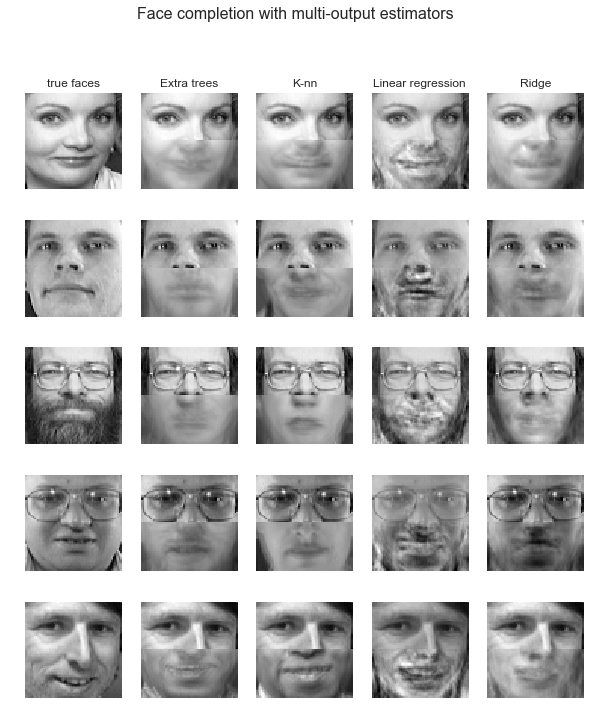

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()